In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import spacy

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist

2023-08-02 17:00:15.271681: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 17:00:18.518426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-02 17:00:18.530280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 17:00:28.517725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

df = pd.DataFrame(train)

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [5]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
df.shape

(31962, 3)

In [7]:
df.values

array([[1, 0,
        ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'],
       [2, 0,
        "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"],
       [3, 0, '  bihday your majesty'],
       ...,
       [31960, 0,
        'listening to sad songs on a monday morning otw to work is sad  '],
       [31961, 1,
        '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  '],
       [31962, 0, 'thank you @user for you follow  ']], dtype=object)

## Cleaning Process

1. Dropping id column
2. Removing @user 
3. removing puncation, numbers, special characters
4. Removing words less than length 3 (optional)
(a faster to do this might be np.vectorize)

In [8]:
df.drop(["id"], axis="columns", inplace=True)

df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
# removing @user
df['clean'] = df['tweet'].str.replace("@[\w]*", " ", regex=True)

# removing special character
df['clean'] = df['tweet'].str.replace("[^a-zA-Z]", " ", regex=True)

## STEMMING PROCESS

- DIVIDING sentence in to list of words
- REMPVING stop words
- STEMMING
- JOINING to create a sentence

In [10]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a function to stem a text
def stem_text(text):
    word_tokens = nltk.word_tokenize(text)
    filtered_token = [w for w in word_tokens if not w.lower() in stop_words]
    stemmed_words = [stemmer.stem(word) for word in filtered_token]
    stemmed_text = " ".join(stemmed_words)
    return stemmed_text


df["stemmed"] = df["clean"].apply(stem_text)

In [11]:
df.head(10)

,label,tweet,clean,stemmed
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t us...,user user thank lyft credit use caus offer whe...
2,0,bihday your majesty,bihday your majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society now motivation,factsguid societi motiv
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...,huge fan fare big talk leav chao pay disput ge...
6,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...,user camp tomorrow user user user user user us...
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...,next school year year exam think school exam h...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...,love land allin cav champion cleveland clevela...
9,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i m it s so gr...,user user welcom gr


## Visualization

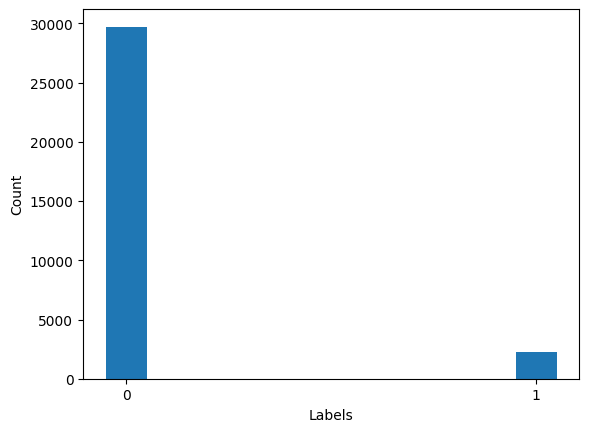

In [12]:
# Bar graph

y = np.array(df["label"].value_counts())
x = np.array([0, 1])

plt.bar(x, y, width = 0.1)

plt.xlabel("Labels")
plt.ylabel("Count")

plt.xticks(x, x)

plt.show()

## Creating 2 WordCloud

positive words cloud

In [13]:
all_positive_word = " ".join(text for text in df["stemmed"][df["label"]==0])

In [14]:
words = all_positive_word.split()
fdist1 = FreqDist(words)

for i in range(20):
    print(fdist1.most_common()[i])

('user', 15719)
('love', 3209)
('day', 2907)
('happi', 2094)
('thank', 1537)
('amp', 1478)
('time', 1233)
('get', 1208)
('life', 1169)
('u', 1164)
('go', 1117)
('like', 1105)
('today', 1089)
('posit', 990)
('father', 951)
('make', 949)
('new', 931)
('smile', 928)
('bihday', 889)
('good', 858)


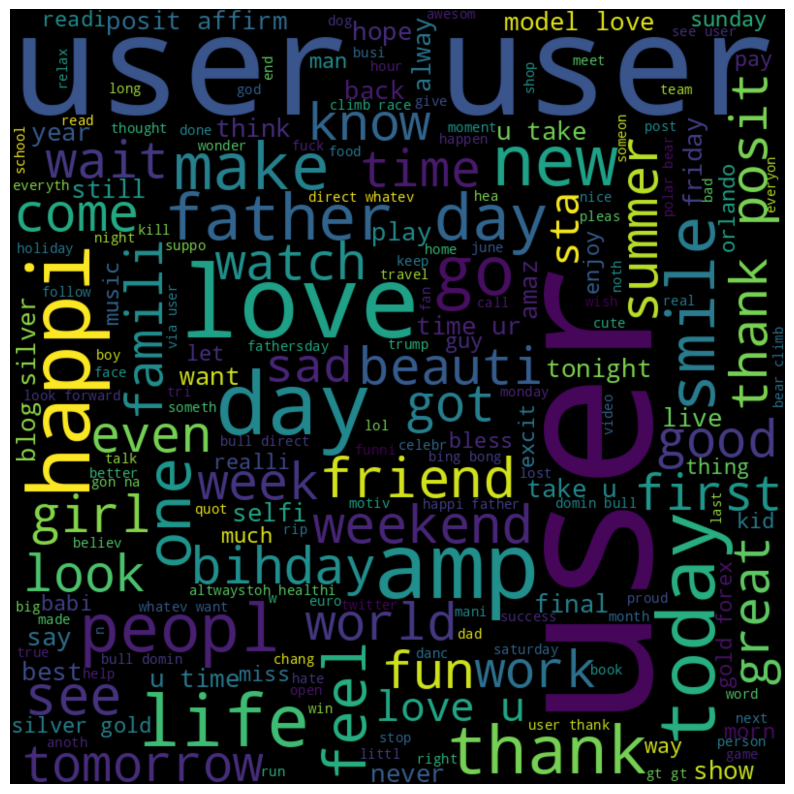

In [16]:
wc = WordCloud(background_color='black', height=800, width=800).generate(all_positive_word)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(),interpolation="gaussian")
plt.axis('off')
plt.show()

negative words cloud

In [18]:
all_negative_words = " ".join(text for text in df["stemmed"][df["label"]==1])

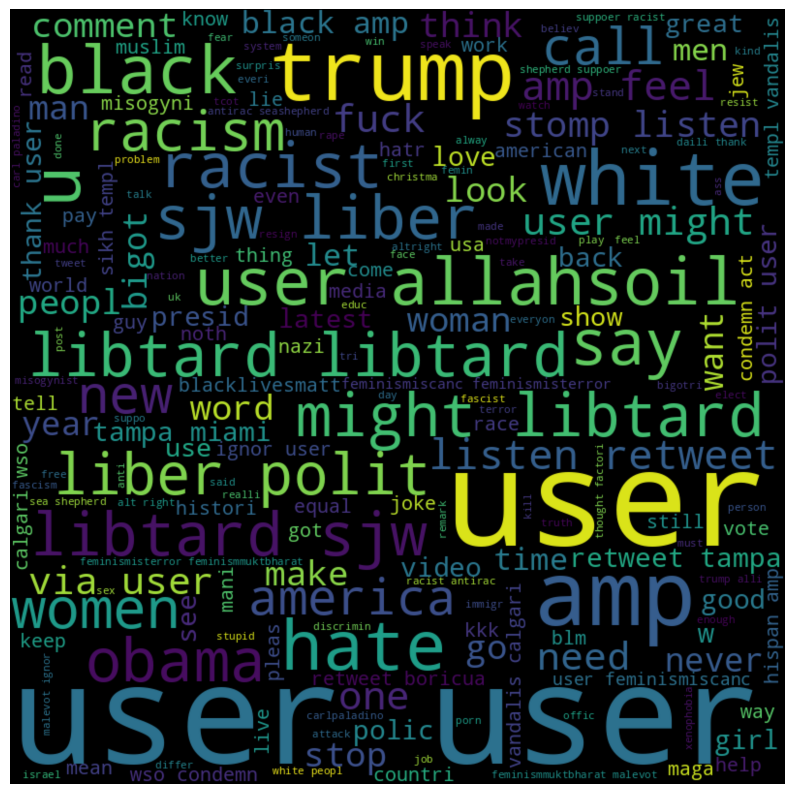

In [19]:
wc = WordCloud(background_color='black', height=800, width=800).generate(all_negative_words)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(),interpolation="gaussian")
plt.axis('off')
plt.show()

There are 2 ways to solve this:

- Bag of words
- TfidfVectorizer

## Create BAG OF WORDS

- CountVectorization
- Train/Test Dataset
- Model
- Predication

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_df=0.85, min_df=10, max_features=5000)

vect_stem = vectorizer.fit_transform(df['stemmed'])

vect_stem.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [33]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(vect_stem, df['label'], test_size=0.3, random_state=2)


In [35]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=21,solver='lbfgs')
Log_Reg.fit(x_train_bow, y_train_bow)

/home/lucifer/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=21)

In [36]:
prediction_bow = Log_Reg.predict_proba(x_test_bow)

prediction_bow

array([[9.83340248e-01, 1.66597517e-02],
       [9.99772731e-01, 2.27269173e-04],
       [9.48005861e-01, 5.19941393e-02],
       ...,
       [9.74087582e-01, 2.59124180e-02],
       [9.67429241e-01, 3.25707588e-02],
       [9.51257782e-01, 4.87422182e-02]])

In [37]:
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_test_bow, prediction_int)

log_bow

/tmp/ipykernel_13305/4173761143.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


0.6388443017656501

## Create TfidfVectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=5000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['stemmed'])

tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, df['label'],test_size=0.3,random_state=17)


In [40]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

prediction_tfidf = Log_Reg.predict_proba(x_test_tfidf)

prediction_tfidf

prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_test_tfidf, prediction_int)

log_tfidf

/tmp/ipykernel_13305/3800069480.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


0.6618962432915921